** Experiment 4 **

* Exploratory Data Analysis of the problem
* What is the nature of the data ?
* How is the data laid out ?
* Feature Generation Ideas

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from natsort import natsorted
from collections import defaultdict

sns.set_style('dark')
pd.set_option('max_columns', None)

SEED = 131341
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

%run ../src/data/HotstarDataset.py
%run ../src/features/categorical_features.py

In [5]:
dataset = Hotstar('../data/raw/5f828822-4--4-hotstar_dataset/')
dataset.load_data('../data/processed/hotstar_processed.feather')

In [7]:
data       = dataset.data
train_mask = dataset.get_train_mask() 

** Similarities between train and test set **

In [36]:
# cities involved in training set
cities_train = set([])
cities_test  = set([])

def add_to_train_set(cities):
    for city in cities.split(','):
        cities_train.add(city)

def add_to_test_set(cities):
    for city in cities.split(','):
        cities_test.add(city)

data.loc[train_mask, 'cities'].str.replace('[:](\d+)', '')\
    .map(add_to_train_set)
    
data.loc[~train_mask, 'cities'].str.replace('[:](\d+)', '')\
    .map(add_to_test_set);

In [37]:
print('Cities that are in training set but not in test set \n', cities_train - cities_test)

Cities that are in training set but not in test set 
 {'kokrajhar', 'bien hoa', 'tomelloso', 'ballerup', 'higashi', 'campulung', 'saskatoon', 'cancun', 'sehore', 'windhoek', 'satara', 'montfermeil', 'tumkur', 'kuala dungun', 'kuppam', 'poissy', 'silkeborg', 'weehawken', 'gent', 'tauranga', 'norwich', 'lake forest', 'vishakhapatnam', 'jind', 'albuquerque', 'phuket', 'tardeo', 'kota pinang', 'yojna vihar', 'lubumbashi', 'baton rouge', 'sunnyvale', 'vientiane', 'cachan', 'kuala pilah', 'small heath', 'university of new south wales', 'betul', 'ongole', 'waltham', 'grafton', 'sunshine', 'quanzhou', 'vilvoorde', 'timisoara', 'mahwa', 'aubonne', 'bedok', 'pali', 'semarang', 'ilford', 'mount gambier', 'logrono', 'fort-de-france', 'sungai petani', 'alexandria', 'racine', 'stapleford', "lower prince's quarter", 'exeter', 'west bromwich', 'yiwu', 'hahira', 'massy', 'jagadhri', 'rzeszow', 'bari', 'guayaquil', 'norrkoping', 'vittal nagar', 'thornhill', 'clichy', 'kuala belait', 'hampton', 'albury',

In [38]:
print('Cities that are in test set but not in training set \n', cities_test - cities_train)

Cities that are in test set but not in training set 
 {'baltimore', 'asker', 'pitesti', 'merrimack', 'beaverton', "qiu'aizhen", 'frankfurt-innenstadt', 'monterrey', 'baki', 'aabenraa', 'sarcelles', 'cagliari', 'merrifield', 'tehri', 'yuzhno-sakhalinsk', 'rewari', 'alor setar', 'jawahar nagar', 'veenendaal', 'matawan', 'frankfurt-griesheim', 'fuzhou', 'llantwit fardre', 'jalgaon', 'paradiso', 'pithoragarh', 'wageningen', 'tranbjerg', 'regina', 'nanaimo', 'pozuelo de alarcon', 'colpalombo', 'phaltan', 'zhengzhou', 'toluca de lerdo', 'saint peter port', 'pantin', 'roxas', 'pleasanton', 'bridgetown', 'irvine', 'krabi', 'midrand', 'quebec city', 'kosice', 'fort huachuca', 'joda', 'tampa', 'gaborone', 'de hoef', 'taiping', 'chelyabinsk', 'guetersloh', '`ajman', 'bloherfelde', 'oakville', 'rostov-na-donu', 'porbandar', 'bath', 'barnaul', 'bridgeton', 'carshalton', 'perris', 'cuxhaven', 'cuddalore', 'perugia', 'angamaly', 'cirebon', 'xiamen', 'panathur', 'belize city', 'son en breugel', 'dhang

In [39]:
# cities involved in training set
genres_train = set([])
genres_test  = set([])

def add_to_train_set(genres):
    for genre in genres.split(','):
        genres_train.add(genre)

def add_to_test_set(genres):
    for genre in genres.split(','):
        genres_test.add(genre)

data.loc[train_mask, 'genres'].str.replace('[:](\d+)', '')\
    .map(add_to_train_set)
    
data.loc[~train_mask, 'genres'].str.replace('[:](\d+)', '')\
    .map(add_to_test_set);

In [44]:
print('Genres that are in training but not in test ', genres_train - genres_test)

Genres that are in training but not in test  set()


In [45]:
print('Genres that are in the test set but not in training set ', genres_test - genres_train)

Genres that are in the test set but not in training set  set()


** Feature Engineering **

1. Number of cities
2. Number of genres
3. Number of titles

In [17]:
data['num_cities'] = data.cities.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_genres'] = data.genres.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_titles'] = data.titles.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_tod']    = data.tod.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_dow']    = data.dow.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))

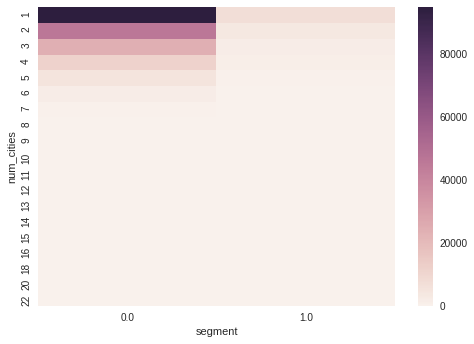

In [11]:
ss = pd.crosstab(data.loc[train_mask, 'num_cities'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

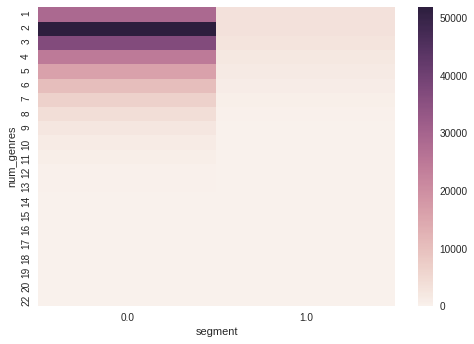

In [12]:
ss = pd.crosstab(data.loc[train_mask, 'num_genres'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

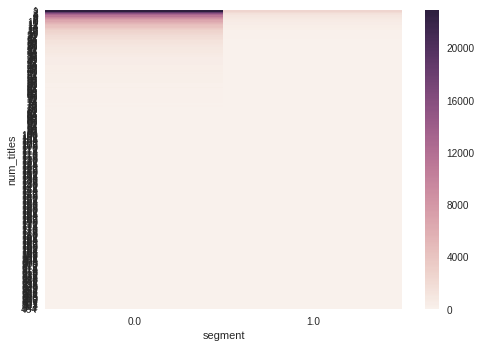

In [13]:
ss = pd.crosstab(data.loc[train_mask, 'num_titles'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

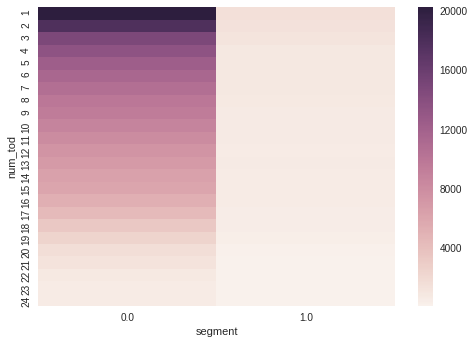

In [18]:
ss = pd.crosstab(data.loc[train_mask, 'num_tod'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

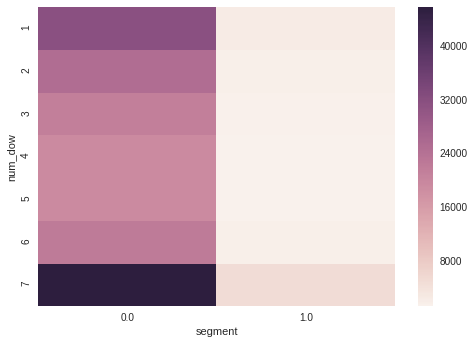

In [19]:
ss = pd.crosstab(data.loc[train_mask, 'num_dow'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

In [35]:
ids = data.loc[train_mask, 'ID'].map(lambda x: x.split('-')[1]).astype(np.int)

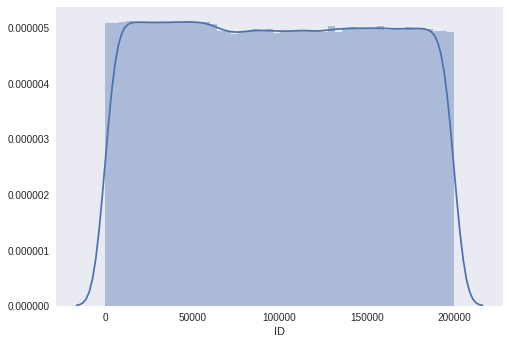

In [40]:
sns.distplot(ids[train_mask & (data.segment == 0)]);

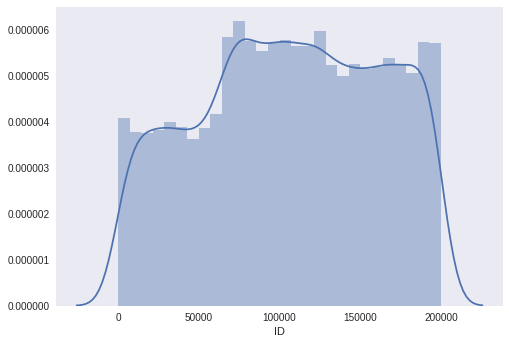

In [41]:
sns.distplot(ids[train_mask & (data.segment == 1)]);

** Relationship of segment with title **

In [47]:
out_segment_titles = defaultdict(int)
in_segment_titles  = defaultdict(int)

def count_out_samples(ts):
    titles = ts.split(',')
    
    for title in titles:
        out_segment_titles[title] += 1

def count_in_samples(ts):
    titles = ts.split(',')
    
    for title in titles:
        in_segment_titles[title] += 1
        
data.loc[train_mask & (data.segment == 0), 'titles'].str.replace('[:](\d+)', '').map(count_out_samples)
data.loc[train_mask & (data.segment == 1), 'titles'].str.replace('[:](\d+)', '').map(count_in_samples);

In [61]:
in_segment_df  = pd.DataFrame.from_dict(in_segment_titles, orient='index')
out_segment_df = pd.DataFrame.from_dict(out_segment_titles, orient='index')

In [62]:
merge_title_segments = in_segment_df.merge(out_segment_df, 
                                           left_index=True, 
                                           right_index=True,
                                           how='left'
                                          ).rename(columns={
    '0_x': 'insegment_count',
    '0_y': 'outsegment_count'
})

In [66]:
ss = merge_title_segments.sort_values(by='outsegment_count', ascending=False)
ss['ratio'] = ss['insegment_count'] / (ss['insegment_count'] + ss['outsegment_count'])

In [71]:
ss.sort_values(by=['outsegment_count', 'ratio'], ascending=False)\
  .reset_index()\
  .to_csv('../data/interim/title_segment_relationship.csv')

** Relationship of genres with segments **

In [72]:
out_segment_genres = defaultdict(int)
in_segment_genres  = defaultdict(int)

def count_out_samples(gs):
    genres = gs.split(',')
    
    for genre in genres:
        out_segment_genres[genre] += 1

def count_in_samples(gs):
    genres = gs.split(',')
    
    for genre in genres:
        in_segment_genres[genre] += 1
        
data.loc[train_mask & (data.segment == 0), 'genres'].str.replace('[:](\d+)', '').map(count_out_samples)
data.loc[train_mask & (data.segment == 1), 'genres'].str.replace('[:](\d+)', '').map(count_in_samples);

In [73]:
in_segment_df  = pd.DataFrame.from_dict(in_segment_genres, orient='index')
out_segment_df = pd.DataFrame.from_dict(out_segment_genres, orient='index')

In [74]:
merge_genres_segments = in_segment_df.merge(out_segment_df, 
                                           left_index=True, 
                                           right_index=True,
                                           how='left'
                                          ).rename(columns={
    '0_x': 'insegment_count',
    '0_y': 'outsegment_count'
})

In [76]:
ss = merge_genres_segments.sort_values(by='outsegment_count', ascending=False)
ss['ratio'] = ss['insegment_count'] / (ss['insegment_count'] + ss['outsegment_count'])

In [77]:
ss.reset_index()\
  .to_csv('../data/interim/genres_segment_relationship.csv', index=False)

** Number of seconds watched **

In [59]:
data['watch_time_sec'] = data.genres\
                             .str\
                             .replace('.+[:]', '')\
                             .map(lambda x: np.sum([int(z) for z in x.split(',')]))

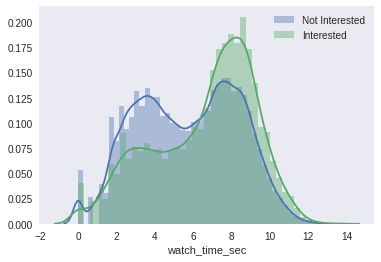

In [62]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec'].map(np.log1p), label='Interested')
plt.legend(loc='best');

In [63]:
data['watch_time_sec_cities'] = data.cities\
                                 .str\
                                 .replace('.+[:]', '')\
                                 .map(lambda x: np.sum([int(z) for z in x.split(',')]))

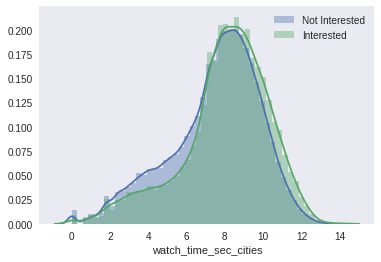

In [64]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec_cities'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec_cities'].map(np.log1p), label='Interested')
plt.legend(loc='best');

In [66]:
data['watch_time_sec_titles'] = data.titles\
                                 .str\
                                 .replace('.+[:]', '')\
                                 .map(lambda x: np.sum([int(z) for z in x.split(',') if len(z) > 0]))

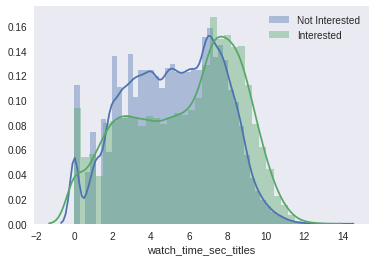

In [67]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec_titles'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec_titles'].map(np.log1p), label='Interested')
plt.legend(loc='best');